In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [60]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

,y1,y2,y3,y4
0,1.06,0.08,0.00,1.03
1,1.90,1.10,1.72,0.80
2,1.21,-0.12,-0.08,1.04
3,0.88,0.91,1.27,0.86
4,0.92,1.00,1.07,1.11
...,...,...,...,...
195,0.83,0.98,1.06,0.93
196,2.10,0.81,1.79,1.10
197,0.93,0.87,1.19,0.86
198,0.90,0.17,0.01,1.04


In [61]:
#Проверяем размерность
print(x_data.shape)
print(y_data.shape)

(200, 4)
(200, 4)


In [62]:
# import matplotlib.pyplot as plt
from scipy.spatial import distance

euclidean = distance.cdist(x_data, y_data, 'euclidean')  ## Возвращает матрицу всех попарных расстояний.
euclidean

array([[ 8.35920451,  6.47507529,  8.38544572, ...,  7.37580504,
         8.41851531,  6.26522146],
       [11.03901264,  9.15793099, 11.06066906, ..., 10.05279066,
        11.09936485,  8.94338303],
       [11.55902245,  9.64634128, 11.57930913, ..., 10.57008042,
        11.62162209,  9.43548091],
       ...,
       [10.5728804 ,  8.71828538, 10.59578218, ...,  9.58948382,
        10.63135457,  8.5010764 ],
       [10.42109879,  8.5558518 , 10.44386423, ...,  9.43707052,
        10.48027671,  8.33989209],
       [ 8.73086479,  6.83485918,  8.75578666, ...,  7.74707687,
         8.79133096,  6.62592635]])

### Матрица расстояний
![Основные функции растояний](img.png)

## Евклидово расстояние - 
### Числовые данные с высокой размерностью: Евклидово расстояние может страдать от "проклятия размерности", когда расстояния становятся менее значимыми

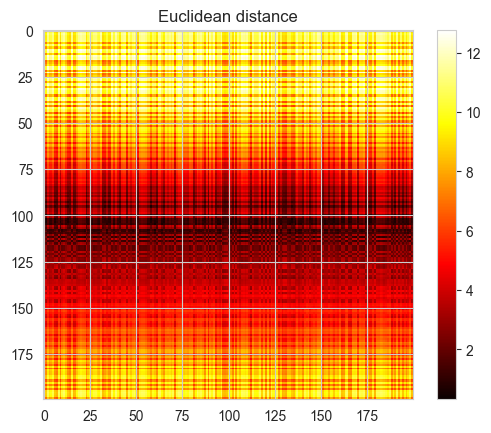

In [63]:
plt.imshow(euclidean,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Euclidean distance', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=1000, bbox_inches='tight')
plt.show()

###  Cosine similarity
#### Измеряет косинус угла между векторами. Полезно для текстовых данных или других многомерных данных, где величина векторов менее важна, чем их направление.

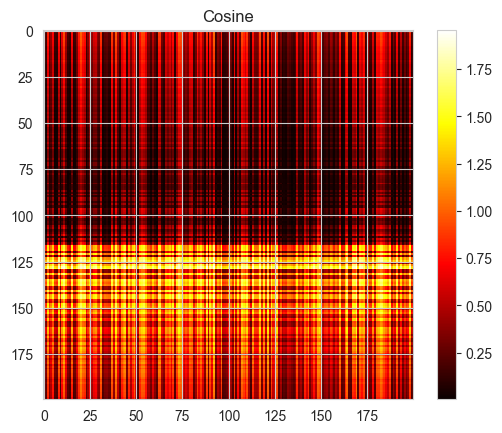

In [64]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cos')

plt.imshow(d,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Cosine', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

### Манхэттенская метрика
#### Часто используется в высокоразмерных пространствах из-за лучшей устойчивости к выбросам.

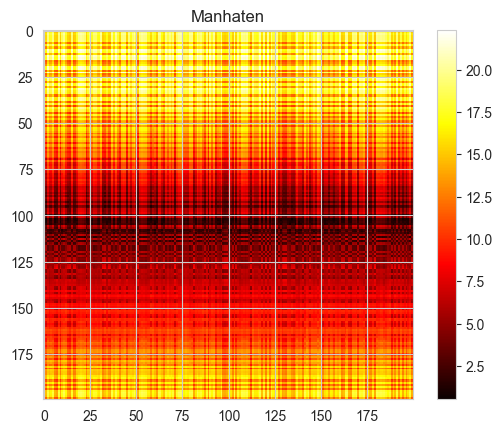

In [65]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cityblock')

plt.imshow(d,cmap='hot',interpolation='nearest')
plt.colorbar()

plt.title('Manhaten', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

In [66]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

,y1,y2,y3,y4
0,1.06,0.08,0.00,1.03
1,1.90,1.10,1.72,0.80
2,1.21,-0.12,-0.08,1.04
3,0.88,0.91,1.27,0.86
4,0.92,1.00,1.07,1.11
...,...,...,...,...
195,0.83,0.98,1.06,0.93
196,2.10,0.81,1.79,1.10
197,0.93,0.87,1.19,0.86
198,0.90,0.17,0.01,1.04


### Расчет матрицы расстояний

In [68]:
# Евклидовы расстояния
x_distances = squareform(pdist(x_data, metric='euclidean'))  # Матрица расстояний для X
y_distances = squareform(pdist(y_data, metric='euclidean'))  # Матрица расстояний для Y

# Вывод матриц расстояний
print("Distance Matrix for X data")
print(x_distances)

print("Distance Matrix for Y data")
print(y_distances)

Distance Matrix for X data
[[0.         2.68791741 3.21494946 ... 2.25608067 2.08600096 0.39076847]
 [2.68791741 0.         0.68789534 ... 0.56727418 0.6436614  2.32778865]
 [3.21494946 0.68789534 0.         ... 1.25195847 1.29649528 2.83481922]
 ...
 [2.25608067 0.56727418 1.25195847 ... 0.         0.20566964 1.92649942]
 [2.08600096 0.6436614  1.29649528 ... 0.20566964 0.         1.74565174]
 [0.39076847 2.32778865 2.83481922 ... 1.92649942 1.74565174 0.        ]]
Distance Matrix for Y data
[[0.         2.18112356 0.26267851 ... 1.44429914 0.18411953 2.35229675]
 [2.18112356 0.         2.29392676 ... 1.1306193  2.20149949 0.41400483]
 [0.26267851 2.29392676 0.         ... 1.64432357 0.43393548 2.45318161]
 ...
 [1.44429914 1.1306193  1.64432357 ... 0.         1.38408815 1.2662938 ]
 [0.18411953 2.20149949 0.43393548 ... 1.38408815 0.         2.3744473 ]
 [2.35229675 0.41400483 2.45318161 ... 1.2662938  2.3744473  0.        ]]


### Расчет матрицы близостей и построение графовой модели

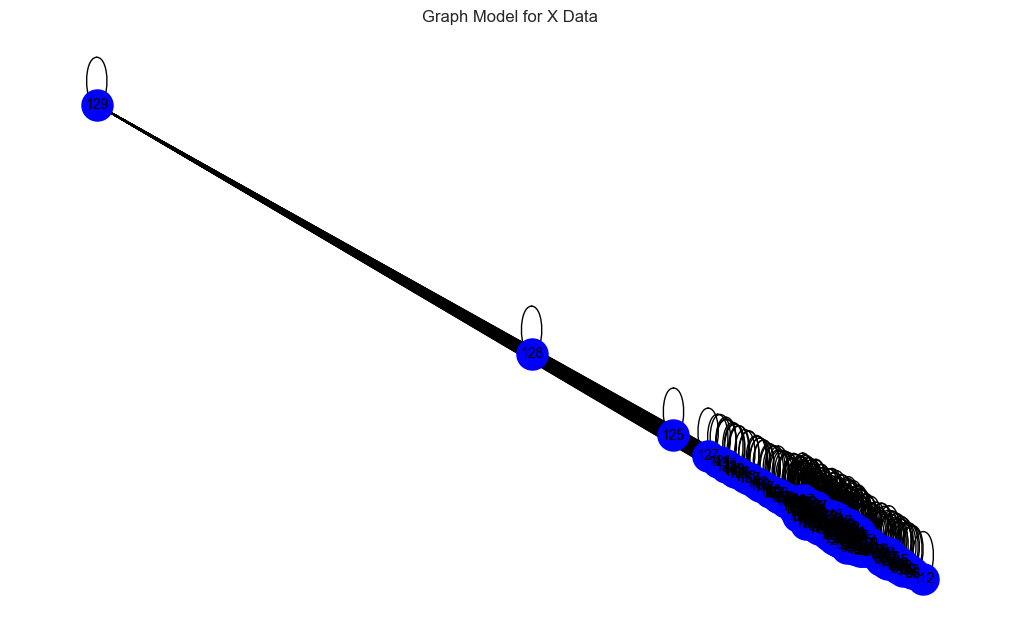

In [69]:
# Преобразование расстояний в близости (пример с использованием cosine_similarity)
x_similarity = cosine_similarity(x_data)
y_similarity = cosine_similarity(y_data)

# Построение графовой модели (полного, взвешенного, неориентированного)
x_graph = nx.Graph(x_similarity)
y_graph = nx.Graph(y_similarity)

# Визуализация графа (пример для X данных)
plt.figure(figsize=(10, 6))
nx.draw(x_graph, with_labels=True, node_color='blue', node_size=500, font_size=10)
plt.title("Graph Model for X Data")
plt.show()

## 1. Кластеризация на 2 кластера

### 1.1 Алгоритмы кластеризации:

#### Метод иерархической кластеризации (Ward Linkage)

In [70]:
from sklearn.cluster import AgglomerativeClustering

# Ward Linkage для данных напрямую (без precomputed матрицы)
hierarchical_clust_x = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clust_y = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Фит и предсказания кластеров
x_clusters_hierarchical = hierarchical_clust_x.fit_predict(x_similarity)
y_clusters_hierarchical = hierarchical_clust_y.fit_predict(y_similarity)

print("X clusters with Ward Linkage:", x_clusters_hierarchical)
print("Y clusters with Ward Linkage:", y_clusters_hierarchical)


X clusters with Ward Linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with Ward Linkage: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### K-means

In [71]:
# K-means для матрицы расстояний
kmeans = KMeans(n_clusters=2, random_state=42)
x_clusters_kmeans = kmeans.fit_predict(x_similarity)
y_clusters_kmeans = kmeans.fit_predict(y_similarity)

print("X clusters with K-means:", x_clusters_kmeans)
print("Y clusters with K-means:", y_clusters_kmeans)

X clusters with K-means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with K-means: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### EM алгоритм

In [72]:
# EM алгоритм (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
x_clusters_em = gmm.fit_predict(x_similarity)
y_clusters_em = gmm.fit_predict(y_similarity)

print("X clusters with EM:", x_clusters_em)
print("Y clusters with EM:", y_clusters_em)

X clusters with EM: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with EM: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### Спектральная кластеризация

In [73]:
from sklearn.cluster import SpectralClustering

# Пример использования Normalized Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
x_clusters_spectral = spectral.fit_predict(x_similarity)
y_clusters_spectral = spectral.fit_predict(y_similarity)

print("X clusters with Spectral Clustering:", x_clusters_spectral)
print("Y clusters with Spectral Clustering:", y_clusters_spectral)

X clusters with Spectral Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with Spectral Clustering: [1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


### 1.2 Сравнение попарных разбиений с помощью RAND индекса

In [74]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(x_clusters_hierarchical, x_clusters_kmeans)
rand_index_1_3 = rand_score(x_clusters_hierarchical, x_clusters_em)
rand_index_1_4 = rand_score(x_clusters_hierarchical, x_clusters_spectral)

print("RAND Index between Hierarchical and K-means for X:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index_1_4)

rand_index_2_3 = rand_score(x_clusters_kmeans, x_clusters_em)
rand_index_2_4 = rand_score(x_clusters_kmeans, x_clusters_spectral)

print()
print("RAND Index between K-means and EM for X:", rand_index_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index_2_4)

rand_index_3_4 = rand_score(x_clusters_em, x_clusters_spectral)

print()
print("RAND Index between EM and Spectral for X:", rand_index_3_4)

RAND Index between Hierarchical and K-means for X: 0.9801005025125629
RAND Index between Hierarchical and EM for X: 0.9606030150753769
RAND Index between Hierarchical and Spectral for X: 0.7437185929648241

RAND Index between K-means and EM for X: 0.9801005025125629
RAND Index between K-means and Spectral for X: 0.7298492462311558

RAND Index between EM and Spectral for X: 0.7163819095477387


In [75]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(y_clusters_hierarchical, y_clusters_kmeans)
rand_index_1_3 = rand_score(y_clusters_hierarchical, y_clusters_em)
rand_index_1_4 = rand_score(y_clusters_hierarchical, y_clusters_spectral)

print("RAND Index between Hierarchical and K-means for Y:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for Y:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for Y:", rand_index_1_4)

rand_index_2_3 = rand_score(y_clusters_kmeans, y_clusters_em)
rand_index_2_4 = rand_score(y_clusters_kmeans, y_clusters_spectral)

print()
print("RAND Index between K-means and EM for Y:", rand_index_2_3)
print("RAND Index between K-means and Spectral for Y:", rand_index_2_4)

rand_index_3_4 = rand_score(y_clusters_em, y_clusters_spectral)

print()
print("RAND Index between EM and Spectral for Y:", rand_index_3_4)

RAND Index between Hierarchical and K-means for Y: 1.0
RAND Index between Hierarchical and EM for Y: 1.0
RAND Index between Hierarchical and Spectral for Y: 1.0

RAND Index between K-means and EM for Y: 1.0
RAND Index between K-means and Spectral for Y: 1.0

RAND Index between EM and Spectral for Y: 1.0


### 1.3 Вычисление функции модулярности (по графу)

In [76]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import asyn_lpa_communities

# Получение коммьюнити графа для X данных по одному из методов кластеризации
x_communities = [set(np.where(x_clusters_hierarchical == c)[0]) for c in np.unique(x_clusters_hierarchical)]
modularity_x = modularity(x_graph, x_communities)
print("Modularity for X data with Hierarchical Clustering:", modularity_x)

# Аналогично для Y данных
y_communities = [set(np.where(y_clusters_hierarchical == c)[0]) for c in np.unique(y_clusters_hierarchical)]
modularity_y = modularity(y_graph, y_communities)
print("Modularity for Y data with Hierarchical Clustering:", modularity_y)

Modularity for X data with Hierarchical Clustering: 0.03876485336420646
Modularity for Y data with Hierarchical Clustering: 0.08607410190435333


# 2 Кластеризация для числа кластеров k=3.

## 2.1. Кластеризация на 3 кластера

#### Метод иерархической кластеризации (Ward Linkage)


In [77]:
### 2.1 Алгоритмы кластеризации:

#### Метод иерархической кластеризации (Ward Linkage)from sklearn.cluster import AgglomerativeClustering

# Ward Linkage для данных напрямую (без precomputed матрицы)
hierarchical_clust_x2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clust_y2 = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Фит и предсказания кластеров
x_clusters_hierarchical2 = hierarchical_clust_x2.fit_predict(x_similarity)
y_clusters_hierarchical2 = hierarchical_clust_y2.fit_predict(y_similarity)

print("X clusters with Ward Linkage:", x_clusters_hierarchical2)
print("Y clusters with Ward Linkage:", y_clusters_hierarchical2)


X clusters with Ward Linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 2 2
 1 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Y clusters with Ward Linkage: [1 0 2 0 0 1 0 0 1 0 1 2 0 0 0 1 0 0 0 1 2 1 1 0 0 1 0 1 1 0 0 2 0 0 0 0 0
 2 0 2 0 0 1 2 1 0 1 0 1 2 0 0 1 2 2 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 2
 2 0 0 0 0 1 2 0 0 2 1 1 0 0 1 0 2 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 2 2 1 2
 0 0 1 0 0 0 2 0 1 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 0 1 0
 2 2 1 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 0 1 1 2 0 1 1 2 0 0 0 0 1 0 2 1 2 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


#### K-means


In [78]:
# K-means для матрицы расстояний
kmeans2 = KMeans(n_clusters=3, random_state=42)
x_clusters_kmeans2 = kmeans2.fit_predict(x_similarity)
y_clusters_kmeans2 = kmeans2.fit_predict(y_similarity)

print("X clusters with K-means:", x_clusters_kmeans2)
print("Y clusters with K-means:", y_clusters_kmeans2)

X clusters with K-means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 2 2 2 0 2 0 2 2 2 0 2 2 2 0 0 2 0 0 2 2 2 2 0 0 2 0 2 2 2 0 0
 2 2 2 0 2 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with K-means: [2 1 0 1 1 2 1 1 2 1 2 0 1 1 1 2 1 1 1 2 0 2 2 1 1 2 1 2 2 1 1 0 1 1 1 1 1
 0 1 0 1 1 2 0 2 1 2 1 2 0 1 1 2 0 0 0 1 1 1 1 1 1 2 2 1 1 2 1 2 1 2 1 2 0
 0 1 1 1 1 2 0 1 1 0 2 2 1 1 2 1 0 1 0 1 1 1 2 1 1 1 1 1 1 0 1 2 1 0 0 2 0
 1 1 2 1 1 1 0 1 2 1 0 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 2 1 1 2 1
 0 0 2 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 1 2 2 0 1 2 2 0 1 1 1 1 2 1 0 2 0 2 0
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1]


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### EM алгоритм

In [79]:
# EM алгоритм (Gaussian Mixture Model)
gmm2 = GaussianMixture(n_components=3, random_state=42)
x_clusters_em2 = gmm2.fit_predict(x_similarity)
y_clusters_em2 = gmm2.fit_predict(y_similarity)

print("X clusters with EM:", x_clusters_em2)
print("Y clusters with EM:", y_clusters_em2)

X clusters with EM: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 2 2
 1 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Y clusters with EM: [2 1 0 1 1 0 1 1 2 1 2 0 1 1 1 2 1 1 1 0 0 0 2 1 1 0 1 2 2 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 2 1 2 1 2 0 1 1 2 0 0 0 1 1 1 1 1 1 2 2 1 1 0 1 2 1 2 1 2 0
 0 1 1 1 1 0 0 1 1 0 2 2 1 1 2 1 0 1 2 1 1 1 0 1 1 1 1 1 1 0 1 2 1 0 0 0 0
 1 1 2 1 1 1 0 1 0 1 0 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 2 1
 0 2 2 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 1 2 2 2 1 2 2 0 1 1 1 1 2 1 0 0 2 2 0
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1]


#### Спектральная кластеризация

In [80]:
from sklearn.cluster import SpectralClustering

# Пример использования Normalized Spectral Clustering
spectral2 = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
x_clusters_spectral2 = spectral2.fit_predict(x_similarity)
y_clusters_spectral2 = spectral2.fit_predict(y_similarity)

print("X clusters with Spectral Clustering:", x_clusters_spectral2)
print("Y clusters with Spectral Clustering:", y_clusters_spectral2)

X clusters with Spectral Clustering: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 2 0 2 0 0 0 2 0 0 1 2 2 0 2 2 0 0 0 0 2 2 0 2 0 0 0 2 2
 0 0 0 2 0 0 2 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Y clusters with Spectral Clustering: [1 2 1 0 0 1 2 2 1 2 0 1 0 2 2 1 2 2 0 1 1 1 0 2 0 1 0 1 1 0 0 1 2 2 0 2 2
 1 0 1 0 2 1 1 1 2 1 0 1 1 0 2 1 1 1 1 0 0 2 0 0 2 1 1 0 2 1 0 1 0 1 2 1 1
 1 0 0 0 0 1 1 2 0 1 1 1 0 2 0 2 1 0 1 2 0 0 1 2 2 2 0 0 2 1 2 1 0 1 1 1 1
 0 2 0 0 0 0 1 2 1 2 1 2 1 0 0 1 2 0 2 2 2 0 0 2 2 0 1 0 0 2 1 0 1 2 0 1 0
 1 1 1 2 0 0 2 0 0 2 0 0 1 2 2 1 1 2 2 1 1 1 2 1 1 1 2 0 2 2 1 2 1 1 1 1 1
 1 0 1 2 0 2 1 2 0 2 0 2 0 1 2]


### 2.2 Сравнение попарных разбиений с помощью RAND индекса

In [81]:
# Сравнение кластеризаций (например, для X данных)
rand_index2_1_2 = rand_score(x_clusters_hierarchical2, x_clusters_kmeans2)
rand_index2_1_3 = rand_score(x_clusters_hierarchical2, x_clusters_em2)
rand_index2_1_4 = rand_score(x_clusters_hierarchical2, x_clusters_spectral2)

print("RAND Index between Hierarchical and K-means for X:", rand_index2_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index2_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index2_1_4)

rand_index2_2_3 = rand_score(x_clusters_kmeans2, x_clusters_em2)
rand_index2_2_4 = rand_score(x_clusters_kmeans2, x_clusters_spectral2)

print()
print("RAND Index between K-means and EM for X:", rand_index2_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index2_2_4)

rand_index2_3_4 = rand_score(x_clusters_em2, x_clusters_spectral2)

print()
print("RAND Index between EM and Spectral for X:", rand_index2_3_4)

RAND Index between Hierarchical and K-means for X: 0.9780904522613065
RAND Index between Hierarchical and EM for X: 0.9536683417085428
RAND Index between Hierarchical and Spectral for X: 0.6300502512562814

RAND Index between K-means and EM for X: 0.9333668341708543
RAND Index between K-means and Spectral for X: 0.6193969849246231

RAND Index between EM and Spectral for X: 0.6076381909547739


In [82]:
# Сравнение кластеризаций (например, для X данных)
rand_index2_1_2 = rand_score(y_clusters_hierarchical2, y_clusters_kmeans2)
rand_index2_1_3 = rand_score(y_clusters_hierarchical2, y_clusters_em2)
rand_index2_1_4 = rand_score(y_clusters_hierarchical2, y_clusters_spectral2)

print("RAND Index between Hierarchical and K-means for Y:", rand_index2_1_2)
print("RAND Index between Hierarchical and EM for Y:", rand_index2_1_3)
print("RAND Index between Hierarchical and Spectral for Y:", rand_index2_1_4)

rand_index2_2_3 = rand_score(y_clusters_kmeans2, y_clusters_em2)
rand_index2_2_4 = rand_score(y_clusters_kmeans2, y_clusters_spectral2)

print()
print("RAND Index between K-means and EM for Y:", rand_index2_2_3)
print("RAND Index between K-means and Spectral for Y:", rand_index2_2_4)

rand_index2_3_4 = rand_score(y_clusters_em2, y_clusters_spectral2)

print()
print("RAND Index between EM and Spectral for Y:", rand_index2_3_4)

RAND Index between Hierarchical and K-means for Y: 0.984321608040201
RAND Index between Hierarchical and EM for Y: 0.9376884422110553
RAND Index between Hierarchical and Spectral for Y: 0.7312060301507538

RAND Index between K-means and EM for Y: 0.9469346733668341
RAND Index between K-means and Spectral for Y: 0.7291959798994975

RAND Index between EM and Spectral for Y: 0.73


### 2.3 Вычисление функции модулярности (по графу)

In [83]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import asyn_lpa_communities

# Получение коммьюнити графа для X данных по одному из методов кластеризации
x_communities2 = [set(np.where(x_clusters_hierarchical2 == c)[0]) for c in np.unique(x_clusters_hierarchical2)]
modularity_x2 = modularity(x_graph, x_communities2)
print("Modularity for X data with Hierarchical Clustering:", modularity_x)

# Аналогично для Y данных
y_communities2 = [set(np.where(y_clusters_hierarchical2 == c)[0]) for c in np.unique(y_clusters_hierarchical2)]
modularity_y2 = modularity(y_graph, y_communities2)
print("Modularity for Y data with Hierarchical Clustering:", modularity_y2)

Modularity for X data with Hierarchical Clustering: 0.03876485336420646
Modularity for Y data with Hierarchical Clustering: 0.06597392867317288


## 3. Определение числа кластеро

For n_clusters=2, the average silhouette score is 0.45041457802031204
For n_clusters=3, the average silhouette score is 0.3969435826226536
For n_clusters=4, the average silhouette score is 0.410830234716713
For n_clusters=5, the average silhouette score is 0.38144596765484695
For n_clusters=6, the average silhouette score is 0.39828182089913183
For n_clusters=7, the average silhouette score is 0.4012087662027959
For n_clusters=8, the average silhouette score is 0.42023560901554885


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

For n_clusters=9, the average silhouette score is 0.42248509303223314


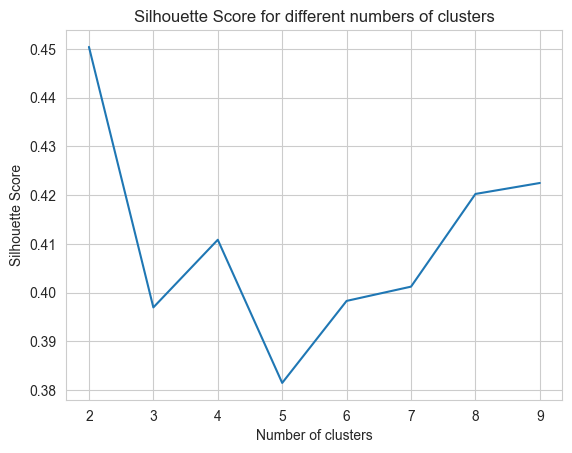

In [84]:
from sklearn.metrics import silhouette_score

# Пример метода силуэта
silhouette_scores = []
range_n_clusters = list(range(2, 10))  # Пример для числа кластеров от 2 до 9

for n_clusters in range_n_clusters:
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(x_data)
    silhouette_avg = silhouette_score(x_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg}")

# Визуализация
plt.plot(range_n_clusters, silhouette_scores)
plt.title("Silhouette Score for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()